# Double Cartpole



The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    x & \dot{x} & \theta_1 & \dot{\theta_1} & \theta_2 & \dot{\theta_2}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    F_{x}
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the carptole upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}
\end{equation*}
$$

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.05  # Time step (s).
RENDER = True  # Whether to render the environment or not.
N = 50 # Horizon length.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.double_cartpole.DoubleCartpoleCost()
model = pddp.examples.double_cartpole.DoubleCartpoleDynamicsModel(DT)
env = pddp.examples.double_cartpole.DoubleCartpoleEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = U.detach().numpy()

    x = X[:, 0]
    x_dot = X[:, 1]
    theta1 = np.unwrap(X[:, 2])  # Makes for smoother plots.
    theta1_dot = X[:, 3]
    theta2 = np.unwrap(X[:, 4])  # Makes for smoother plots.
    theta2_dot = X[:, 5]
    
    plt.figure()
    plt.plot(theta1, theta1_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Link 1 Orientation Phase Plot")

    plt.figure()
    plt.plot(theta2, theta2_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Link 2 Orientation Phase Plot")
    
    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Position path")
    
    plt.figure()
    plt.plot(t, x_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m / s)")
    plt.title("Velocity path")
    
    plt.figure()
    plt.plot(t, theta1)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Link 1 orientation path")

    plt.figure()
    plt.plot(t, theta1_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Link 1 angular velocity path")
    
    plt.figure()
    plt.plot(t, theta2)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Link 2 orientation path")
    
    plt.figure()
    plt.plot(t, theta2_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Link 2 angular velocity path")

    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, state, Z, U, J_opt):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    final_state = Z[-1].detach().numpy()
    final_state[2] = (final_state[2] + np.pi) % (2 * np.pi) - np.pi
    final_state[4] = (final_state[4] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, state, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = 1e-1 * torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U, state = controller.fit(U, encoding=ENCODING, n_iterations=200, tol=0,
                             on_iteration=on_iteration)

iteration 1 iLQRState.NOT_PD 1088.2725 [ 0.00600473  0.00349944  3.1406395  -0.02890579 -3.1391287   0.03745037]
iteration 1 iLQRState.NOT_PD 1088.2725 [ 0.00600473  0.00349944  3.1406395  -0.02890579 -3.1391287   0.03745037]
iteration 1 iLQRState.NOT_PD 1088.2725 [ 0.00600473  0.00349944  3.1406395  -0.02890579 -3.1391287   0.03745037]
iteration 1 iLQRState.NOT_PD 1088.2725 [ 0.00600473  0.00349944  3.1406395  -0.02890579 -3.1391287   0.03745037]
iteration 1 iLQRState.NOT_PD 1088.2725 [ 0.00600473  0.00349944  3.1406395  -0.02890579 -3.1391287   0.03745037]
iteration 1 iLQRState.NOT_PD 1088.2725 [ 0.00600473  0.00349944  3.1406395  -0.02890579 -3.1391287   0.03745037]
iteration 1 iLQRState.ACCEPTED 1088.0482 [ 3.0836351e-03 -1.3385382e-03  3.1409810e+00 -6.0117394e-03
 -3.1405261e+00  3.6594197e-03]
iteration 2 iLQRState.ACCEPTED 1088.0421 [ 1.9908431e-03 -2.5199936e-03  3.1409264e+00 -1.5131366e-03
 -3.1408796e+00 -3.4045335e-04]
iteration 3 iLQRState.ACCEPTED 1088.035 [ 1.1158388e-0

iteration 35 iLQRState.ACCEPTED 326.58096 [-0.05528257  0.09662104  0.21187791 -0.1584369  -0.02917978 -0.08377993]
iteration 36 iLQRState.ACCEPTED 325.77603 [-0.05193529  0.11083722  0.19484515 -0.1650964  -0.04698379 -0.08308136]
iteration 37 iLQRState.REJECTED 325.77603 [-0.05193529  0.11083722  0.19484515 -0.1650964  -0.04698379 -0.08308136]
iteration 37 iLQRState.REJECTED 325.77603 [-0.05193529  0.11083722  0.19484515 -0.1650964  -0.04698379 -0.08308136]
iteration 37 iLQRState.REJECTED 325.77603 [-0.05193529  0.11083722  0.19484515 -0.1650964  -0.04698379 -0.08308136]
iteration 37 iLQRState.ACCEPTED 324.62256 [-0.05063057  0.126567    0.17969672 -0.17022121 -0.0733813  -0.07283181]
iteration 38 iLQRState.ACCEPTED 323.49155 [-0.04889937  0.13413817  0.17941803 -0.17184806 -0.09185015 -0.06555778]
iteration 39 iLQRState.ACCEPTED 321.8672 [-0.04382255  0.14393568  0.19057724 -0.1770575  -0.12664329 -0.05301964]
iteration 40 iLQRState.ACCEPTED 314.5507 [ 0.04441268  0.08738244  0.3156

iteration 89 iLQRState.ACCEPTED 286.17926 [ 9.4499439e-05 -2.8222203e-02  2.8079045e-01 -6.1280727e-02
 -4.1344777e-02  1.8461108e-02]
iteration 90 iLQRState.ACCEPTED 286.17883 [ 6.7619258e-05 -2.8311133e-02  2.8067613e-01 -6.1198711e-02
 -4.1402593e-02  1.8502057e-02]
iteration 91 iLQRState.ACCEPTED 286.17877 [-3.7684804e-06 -2.8279543e-02  2.8068352e-01 -6.1179638e-02
 -4.1368037e-02  1.8489540e-02]
iteration 92 iLQRState.ACCEPTED 286.1786 [-3.8322876e-05 -2.8322875e-02  2.8061473e-01 -6.1131597e-02
 -4.1395184e-02  1.8511355e-02]
iteration 93 iLQRState.ACCEPTED 286.17844 [-1.6491860e-04 -2.8306544e-02  2.8058165e-01 -6.1072588e-02
 -4.1360196e-02  1.8504918e-02]
iteration 94 iLQRState.ACCEPTED 286.1783 [-1.6589684e-04 -2.8311431e-02  2.8057861e-01 -6.1069012e-02
 -4.1360736e-02  1.8506348e-02]
iteration 95 iLQRState.ACCEPTED 286.17822 [-1.8999283e-04 -2.8353989e-02  2.8051537e-01 -6.1024904e-02
 -4.1392934e-02  1.8526614e-02]
iteration 96 iLQRState.REJECTED 286.17822 [-1.8999283e-04

/Users/anass/Dev/personal/pddp/pddp/controllers/ilqr.py:366: UserWarning: exceeded max regularization term
  warnings.warn("exceeded max regularization term")


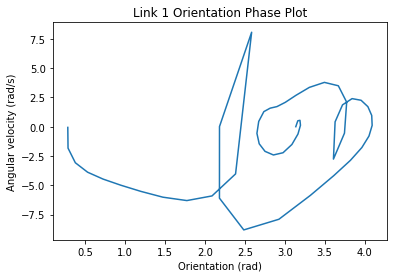

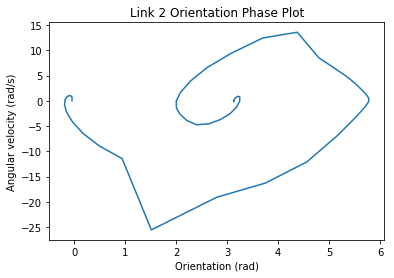

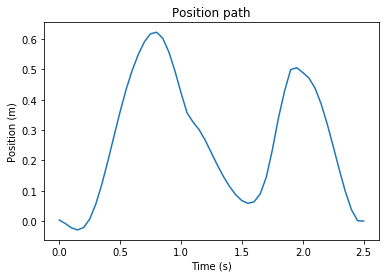

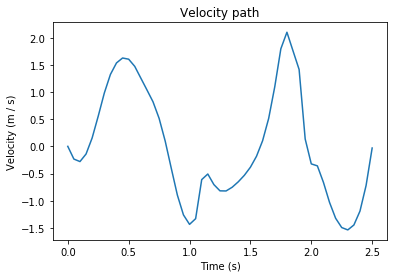

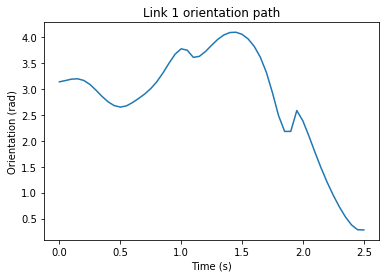

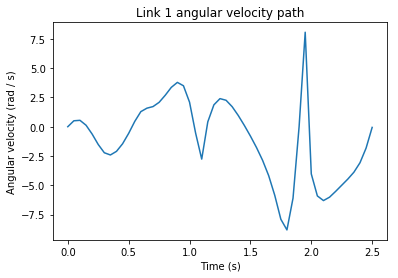

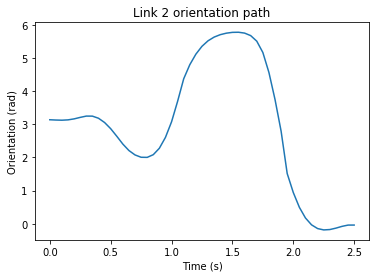

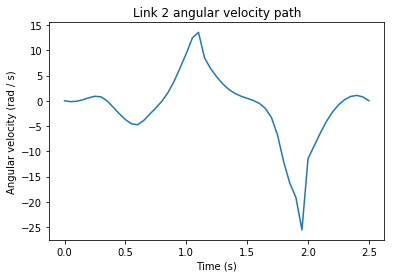

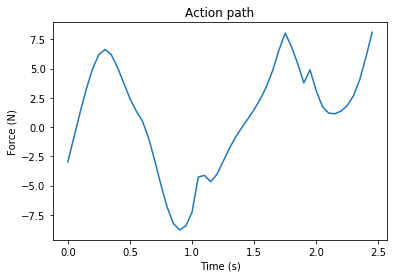

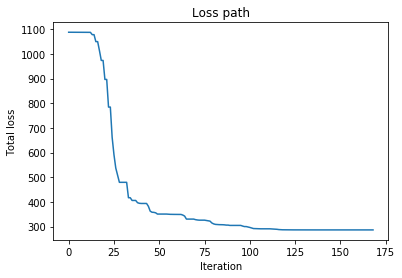

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
env.reset()
for i in range(N):
    z = env.get_state().encode(ENCODING)
    u = controller(z, i, ENCODING)
    env.apply(u)

In [16]:
env.close()